In [1]:
!wget https://s3.amazonaws.com/ir_public/ai/houses/rastered/28x28classed.zip

--2020-12-27 23:21:04--  https://s3.amazonaws.com/ir_public/ai/houses/rastered/28x28classed.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.94.69
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.94.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101224461 (97M) [application/zip]
Saving to: ‘28x28classed.zip’

28x28classed.zip    100%[===================>]  96.54M  16.4MB/s    in 7.2s    

2020-12-27 23:21:12 (13.4 MB/s) - ‘28x28classed.zip’ saved [101224461/101224461]



In [12]:
!unzip 28x28classed.zip -d 28x28/

Streaming output truncated to the last 5000 lines.
 extracting: 28x28/tiger/40295.png   
 extracting: 28x28/tiger/40301.png   
 extracting: 28x28/tiger/40303.png   
 extracting: 28x28/tiger/40313.png   
 extracting: 28x28/tiger/40315.png   
 extracting: 28x28/tiger/4032.png    
 extracting: 28x28/tiger/40337.png   
 extracting: 28x28/tiger/40350.png   
 extracting: 28x28/tiger/40358.png   
 extracting: 28x28/tiger/40362.png   
 extracting: 28x28/tiger/40372.png   
 extracting: 28x28/tiger/40397.png   
 extracting: 28x28/tiger/4040.png    
 extracting: 28x28/tiger/40409.png   
 extracting: 28x28/tiger/40420.png   
 extracting: 28x28/tiger/40421.png   
 extracting: 28x28/tiger/40451.png   
 extracting: 28x28/tiger/40455.png   
 extracting: 28x28/tiger/40458.png   
 extracting: 28x28/tiger/40468.png   
 extracting: 28x28/tiger/40469.png   
 extracting: 28x28/tiger/40472.png   
 extracting: 28x28/tiger/40498.png   
 extracting: 28x28/tiger/40510.png   
 extracting: 28x28/tiger/40517.png   

In [4]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
from pathlib import Path
import numpy as np
import joblib
from tensorflow.keras.preprocessing import image

# Empty lists to hold the images and labels for each each image
x_train = []
y_train = []
# Load the training data set by looping over every image file
for image_file in Path("28x28").glob("**/*.png"):
    # Load the current image file
    image_data = image.load_img(image_file, color_mode="grayscale")
    # image_data = image.load_img(image_file)
    # Convert the loaded image file to a numpy array
    image_array = image.img_to_array(image_data)
    # Add the current image to our list of training images
    x_train.append(image_array)
    # Add a label for this image. 
    if "bird" in str(image_file.parent):
        y_train.append(0)
    elif "lion" in str(image_file.parent):
      y_train.append(1)
    elif "owl" in str(image_file.parent):
      y_train.append(2)
    elif "parrot" in str(image_file.parent):
      y_train.append(3)
    elif "raccoon" in str(image_file.parent):
      y_train.append(4)
    elif "skull" in str(image_file.parent):
      y_train.append(5)
    elif "snail" in str(image_file.parent):
      y_train.append(6)
    elif "snake" in str(image_file.parent):
      y_train.append(7)
    elif "squirrel" in str(image_file.parent):
      y_train.append(8)                                          
    else:
        y_train.append(9)
# Convert the list of separate images into a single 4D numpy array. This is what Keras expects.
x_train = np.array(x_train)

# Convert the list a numpy array. TensorFlow 2.0 doesn't like Python lists.
y_train = np.array(y_train)


In [21]:
from keras.utils.np_utils import to_categorical   

categorical_labels = to_categorical(y_train, num_classes=10)

In [22]:
print(x_train.shape)
print(categorical_labels.shape)

(87541, 28, 28, 1)
(87541, 10)


In [23]:
def visualize_classes():
  for i in range(0, 10):
    img_batch = x_train[y_train == i][0:10]
    img_batch = np.reshape(img_batch, (img_batch.shape[0]*img_batch.shape[1], img_batch.shape[2]))
    if i > 0:
      img = np.concatenate([img, img_batch], axis = 1)
    else:
      img = img_batch
  plt.figure(figsize=(10,20))
  plt.axis('off')
  plt.imshow(img, cmap='gray')

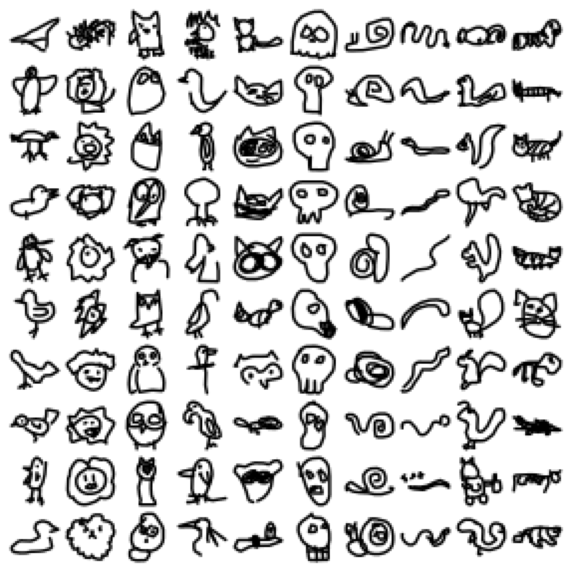

In [24]:
visualize_classes()

In [25]:
permutation = np.random.permutation(y_train.shape[0])
x_train = x_train[permutation, :]
categorical_labels = categorical_labels[permutation]

In [26]:
print(x_train[0:1].shape)

(1, 28, 28, 1)


In [ ]:
# Define model
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same', activation= 'relu'))
model.add(layers.MaxPooling2D(pool_size =(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(10, activation='softmax')) 
# Train model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)              

In [30]:
x_train_norm = x_train / 255.0

In [ ]:
model.fit(x = x_train_norm, y = categorical_labels, validation_split=0.1, batch_size = 256, epochs=20)

Epoch 1/20
308/308 [==============================] - 2s 5ms/step - loss: 1.4503 - accuracy: 0.5185 - val_loss: 0.6499 - val_accuracy: 0.7821
Epoch 2/20
308/308 [==============================] - 1s 4ms/step - loss: 0.5876 - accuracy: 0.8015 - val_loss: 0.5340 - val_accuracy: 0.8155
Epoch 3/20
308/308 [==============================] - 1s 4ms/step - loss: 0.4677 - accuracy: 0.8428 - val_loss: 0.4372 - val_accuracy: 0.8499
Epoch 4/20
308/308 [==============================] - 1s 4ms/step - loss: 0.3977 - accuracy: 0.8646 - val_loss: 0.4068 - val_accuracy: 0.8557
Epoch 5/20
308/308 [==============================] - 1s 4ms/step - loss: 0.3565 - accuracy: 0.8785 - val_loss: 0.3799 - val_accuracy: 0.8675
Epoch 6/20
308/308 [==============================] - 1s 4ms/step - loss: 0.3169 - accuracy: 0.8910 - val_loss: 0.3718 - val_accuracy: 0.8707
Epoch 7/20
308/308 [==============================] - 1s 4ms/step - loss: 0.3014 - accuracy: 0.8965 - val_loss: 0.3345 - val_accuracy: 0.8838
Epoch 

In [28]:
df = pd.DataFrame(categorical_labels)
print(df)

         0    1    2    3    4    5    6    7    8    9
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
1      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
3      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4      0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
87536  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
87537  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
87538  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
87539  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
87540  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[87541 rows x 10 columns]


In [31]:
df_train = pd.DataFrame(x_train_norm.reshape([x_train.shape[0], 28*28]))

In [32]:
print(df_train)

       0    1    2    3    4    5    6    ...  777  778  779  780  781  782  783
0      1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0
1      1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0
2      1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0
3      1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0
4      1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
87536  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0
87537  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0
87538  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0
87539  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0
87540  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0

[87541 rows x 784 columns]


In [33]:
df.to_csv(path_or_buf="answers.csv", index=False)

In [34]:
df_train.to_csv(path_or_buf="images.csv", index=False)